# 实训二 机器学习简单实战

## 1 鸢尾花数据集
参考：Randal S. Olson的文章《An example machine learning notebook》  
机器学习的第一个学习案例，通过这个案例，基本上可以把机器学习的整个过程接触一遍，对机器学习有了初步的了解。整个过程包括：业务问题、数据探索、数据整理和清洗、建模、模型调优、评估等步骤。下面就开始吧。
### 1.1 scikit-leran内置的数据集
**业务问题**

根据鸢尾花(iris)的四个尺寸：花瓣长度(petal_length)、花瓣宽度(petal_width)、花萼长度(sepal_length)、花萼宽度(sepal_width)，判断出花的种类。我们已经采集到一批测量数据，需要根据这些数据通过机器学习建立数据模型，用于判断鸢尾花的种类。

花瓣与花萼的示意图：
![](images/petal_sepal.jpg)

本文用到的数据集（测量数据）包括了三个种类的鸢尾花，分布如图所示：  
**Iris setosa**
![](images/iris_setosa.jpg)
**Iris versicolor**
![](images/iris_versicolor.jpg)
**Iris virginica**
![](images/iris_virginica.jpg)


In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
names = iris.feature_names

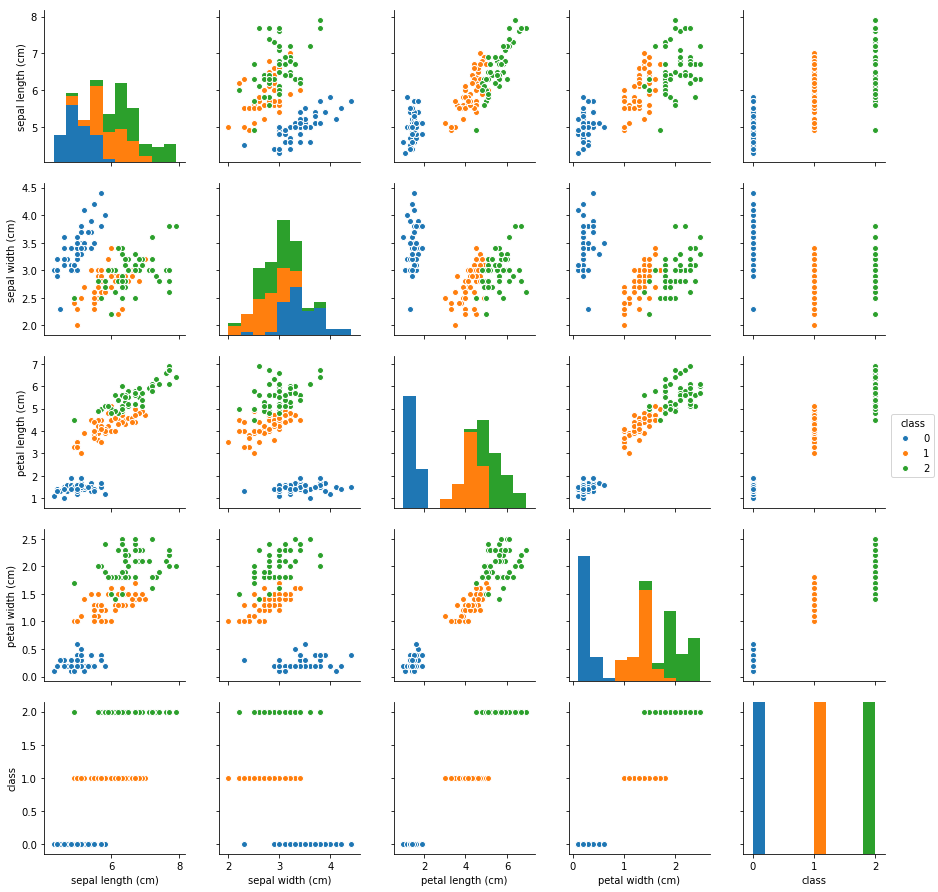

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(X, columns=names)
data["class"] = y
data.head()
sns.pairplot(data, hue="class")

In [3]:
datagrp = data.groupby(by="class")
datagrp.count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


### 1.2 有噪声的数据集
好了，下面可以开始我们的工作。但是先别着急，处理任何数据分析项目，首先需要明确需要解决的问题，并且定义成功的标准。 先来看看需要数据分析师回答的几个问题： 

- 在接触数据之前，你是否明确问题的类别？是数据探索，还是关联分析？ 答：我们要根据花的四项尺寸，对花进行分类
- 你是否定义了成功的衡量方法？ 答：用“准确度”来衡量数据模型的优劣，目标是90%
- 你是否理解这个科学或商业问题的背景和意义？答：背景和意义前面已经简要描述了
- 你是否记录了数据？答：见数据集
- 目前的数据是否足够支持解决问题？答：我们有150条左右的测量数据，对三个种类的花进行分类，初步来看是足够的。当然还要仔细看看数据的质量。如果要更通用的模型，则还需要更多的数据支持。 
- 考虑这几个问题并不是浪费时间，对于任何一个机器学习和数据分析的工作来说，都是很有必要且不可或缺的步骤。下面可以开始数据探索了。

In [4]:
import pandas as pd

iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

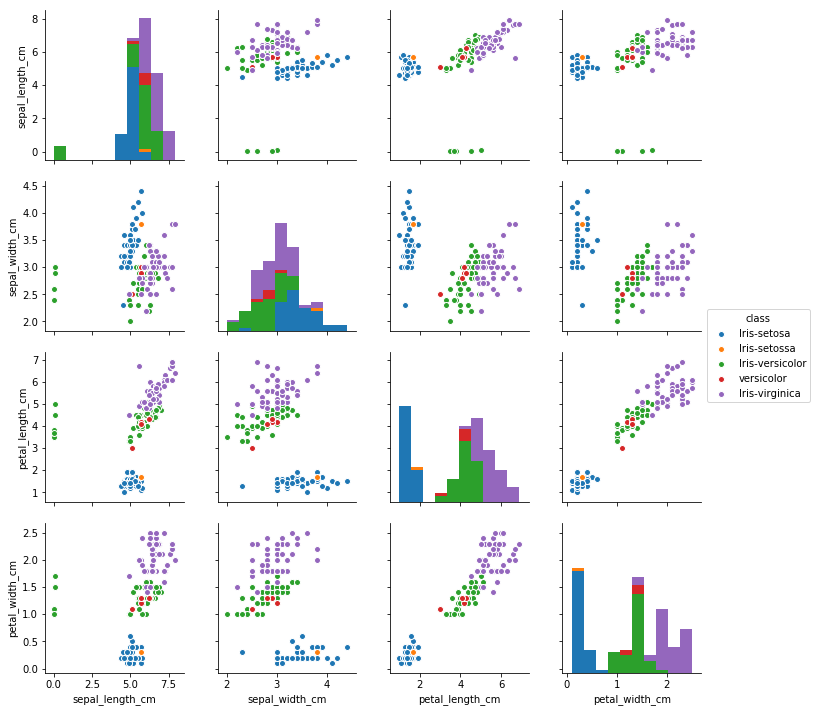

In [7]:
sb.pairplot(iris_data.dropna(), hue='class')

In [8]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

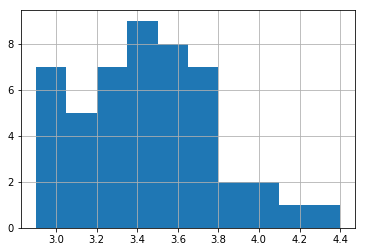

In [9]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

好了，现在所有的 Iris-setosa 花萼宽度都比2.5大。

下一个要解决“一些Iris-versicolor的花萼长度sepal_length_cm接近于零”的问题。让我们看看这些行:

In [10]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


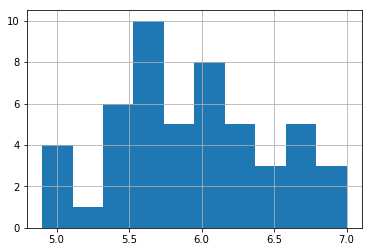

In [11]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [12]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


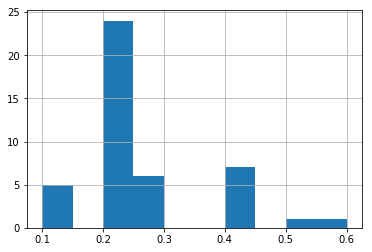

In [13]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [14]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [15]:
#再次检查缺失值
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [16]:
iris_data.to_csv('data/iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('data/iris-data-clean.csv')

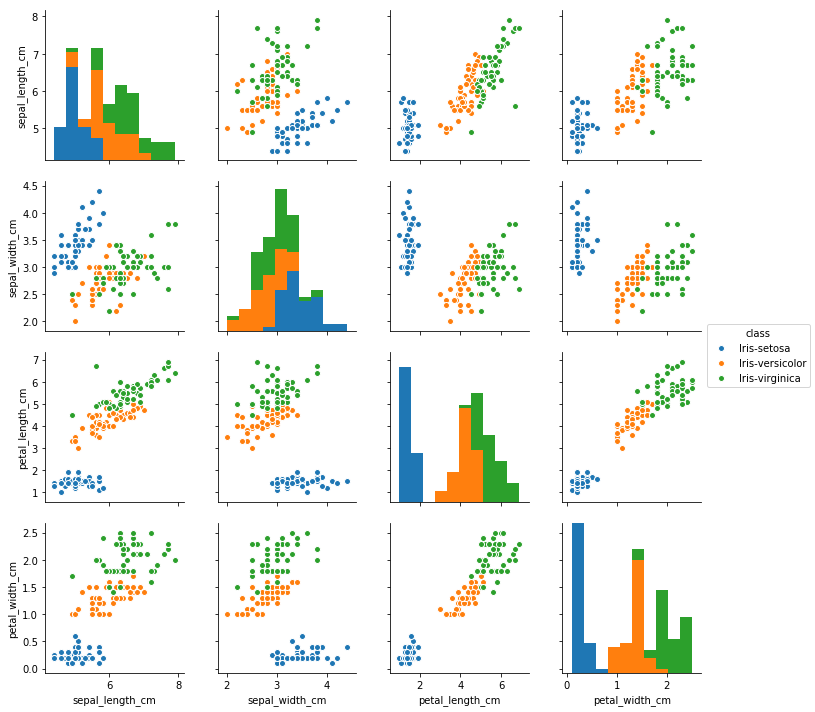

In [17]:
sb.pairplot(iris_data_clean, hue='class')

### 1.3 数据的探索性分析
我们看到有些花瓣的尺寸数据有一点奇怪，是不是由于花的不同种类导致的呢？我们可以再一次通过有色的散点图来观察一次。
果然，花瓣的数值分布，确实跟花的种类有关。这对我们分类的任务来说是个极好的消息，它意味着通过花瓣的尺寸，就可以容易地把iris-sentosa这个品种区分出来。

然而，区分iris-virginica和iris-versicolor这两个品种会困难一下，因为看起来它们的尺寸有些重叠。

花瓣的长度和宽度看起来有一些相关，花萼也有类似现象。我们通过咨生物学家，这是自然现象：较长的花瓣，宽度也会较大，花萼也类似。

我们还可以画出提琴图（violin plots）,对比不同种类的数值分布。提琴图和箱型图所包含的信息是类似的，但它还能体现数据的密度。

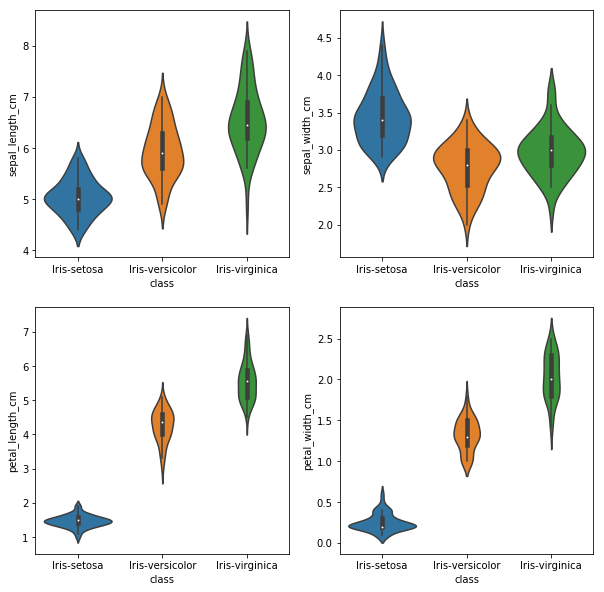

In [18]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

数据摆弄得差不多了，我们进入建模部分吧。  

### 1.4 数据分类
虽然数据清理令人厌烦，但它却是数据分析的关键步骤。如果我们跳过这个阶段直接进入建模，会导致错误的数据模型。

记住：错误的数据导致错误的模型。永远要从检查数据开始。

现在我们已经尽可能地把数据清洗了，并且对数据集的分布和关系有了初步的认识。接下来的重要步骤就是把数据集分为：训练集和测试集。

训练集是数据集的一个随机子集，用于训练模型。

测试集也是数据集的一个随机子集（与训练集互斥分开），用于验证模型的准确性。

尤其对于我们这样一个比较稀疏的数据集来说，容易造成“过度拟合”，就是说对训练集的拟合度过高，以至于不能处理哪些没有见过的数据。这就是为什么我们要把数据集分开，用训练集建模，而用测试集评价模型。

需要注意的是，一旦我们把数据集划分为训练集和测试集，那么我们在建模的过程中，就不能再使用测试集的任何数据，否则就是作弊哦。

In [19]:
iris_data_clean = pd.read_csv('data/iris-data-clean.csv')

# 注意到 scikit-learn 要求所有的记录都要用“列表”list形式表示, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# 所以，我们要把输入数据集转化为一个列表的列表（a list of lists）

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

下面要划分数据集

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_classes, test_size=0.25, random_state=1)

下面用决策树的方法进行分类建模。

决策树的理论其实并不复杂，简单来说，决策树分类就是要求回答一系列的“Yes/No”,这样逐步划分出所有字段的分类。

下面是一个决策树分类器的例子：
![](images/decision-tree.png)

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, y_test)

0.97368421052631582

哇，我们的分类模型准确率达到了97%，而且这么轻易就实现了哦。

可是，别高兴太早，这也许是瞎猫碰上死耗子。因为模型的准确率，是依赖训练集和测试集的取样不同，在大约80%到100%之间变化。

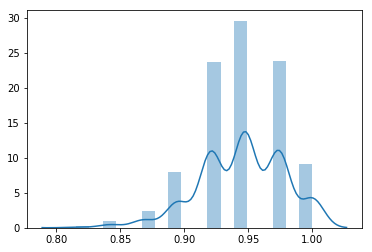

In [24]:
model_accuracies = []

for repetition in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_classes, test_size=0.25)
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(X_train, y_train)
    classifier_accuracy = decision_tree_classifier.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)
sb.distplot(model_accuracies)

问题很明显，模型的表现与训练集的选择有很大关系。这种现象被称为“过度拟合”，模型针对训练集的分类表现太好，以至于对那些没有见过的数据则表现很差。

## 美国收入阶层数据集分析
![](images/美国收入阶层数据集.png)

In [26]:
import pandas as pd
import numpy as np

### 读取数据集

In [23]:
# 准备数据集
dataset_path='data/adult.data'
df=pd.read_csv(dataset_path,header=None)
print(df.info()) # 加载没有问题
# 原数据集包含有32561个样本，每一个样本含有14个features, 一个label
print(df.head())
raw_set=df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Marrie

In [24]:
# 数据处理一：去除字符串数值前面的空格
str_cols=[1,3,5,6,7,8,9,13,14]
for col in str_cols:
    df.iloc[:,col]=df.iloc[:,col].map(lambda x: x.strip())

In [27]:
# 数据处理二： 删除缺失值样本
# 将?字符串替换为NaN缺失值标志
df.replace("?",np.nan,inplace=True)
# 此处直接删除缺失值样本
df.dropna(inplace=True)
print(df.shape) # (30162, 15)

(30162, 15)


In [28]:
# 数据处理三：对字符数据进行编码
from sklearn import preprocessing
label_encoder=[] # 放置每一列的encoder
encoded_set = np.empty(df.shape)
for col in range(df.shape[1]):
    encoder=None
    if df.iloc[:,col].dtype==object: # 字符型数据
        encoder=preprocessing.LabelEncoder()
        encoded_set[:,col]=encoder.fit_transform(df.iloc[:,col])
    else:  # 数值型数据
        encoded_set[:,col]=df.iloc[:,col]
    label_encoder.append(encoder)

In [31]:
pd.DataFrame(encoded_set)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39.0,5.0,77516.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,40.0,38.0,0.0
1,50.0,4.0,83311.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0,0.0
2,38.0,2.0,215646.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0,0.0
3,53.0,2.0,234721.0,1.0,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0,0.0
4,28.0,2.0,338409.0,9.0,13.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0,0.0
5,37.0,2.0,284582.0,12.0,14.0,2.0,3.0,5.0,4.0,0.0,0.0,0.0,40.0,38.0,0.0
6,49.0,2.0,160187.0,6.0,5.0,3.0,7.0,1.0,2.0,0.0,0.0,0.0,16.0,22.0,0.0
7,52.0,4.0,209642.0,11.0,9.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,45.0,38.0,1.0
8,31.0,2.0,45781.0,12.0,14.0,4.0,9.0,1.0,4.0,0.0,14084.0,0.0,50.0,38.0,1.0
9,42.0,2.0,159449.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,5178.0,0.0,40.0,38.0,1.0


In [32]:
# 数据处理四：对某些列进行范围缩放
# print(encoded_set.dtype) # float64 没问题

cols=[2,10,11]
data_scalers=[] # 专门用来放置scaler
for col in cols:
    data_scaler=preprocessing.MinMaxScaler(feature_range=(-1,1)) 
    encoded_set[:,col]=np.ravel(data_scaler.fit_transform(encoded_set[:,col].reshape(-1,1)))
    data_scalers.append(data_scaler)


In [33]:
dataset_X,dataset_y=encoded_set[:,:-1],encoded_set[:,-1]
# 数据处理五：拆分数据集为train set和test set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y=train_test_split(dataset_X,dataset_y,
                                                  test_size=0.3,random_state=42)


In [34]:
# 建立朴素贝叶斯分类器模型
from sklearn.naive_bayes import GaussianNB
gaussianNB=GaussianNB()
gaussianNB.fit(train_X,train_y)

# 2 用交叉验证来检验模型的准确性，只是在test set上验证准确性
from sklearn.cross_validation import cross_val_score
num_validations=5
accuracy=cross_val_score(gaussianNB,test_X,test_y,
                         scoring='accuracy',cv=num_validations)
print('准确率：{:.2f}%'.format(accuracy.mean()*100))
precision=cross_val_score(gaussianNB,test_X,test_y,
                         scoring='precision_weighted',cv=num_validations)
print('精确度：{:.2f}%'.format(precision.mean()*100))
recall=cross_val_score(gaussianNB,test_X,test_y,
                         scoring='recall_weighted',cv=num_validations)
print('召回率：{:.2f}%'.format(recall.mean()*100))
f1=cross_val_score(gaussianNB,test_X,test_y,
                         scoring='f1_weighted',cv=num_validations)
print('F1  值：{:.2f}%'.format(f1.mean()*100))

# 3 打印性能报告
from sklearn.metrics import confusion_matrix
y_pred=gaussianNB.predict(test_X)
confusion_mat = confusion_matrix(test_y, y_pred)
print(confusion_mat) #看看混淆矩阵长啥样

from sklearn.metrics import classification_report
# 直接使用sklearn打印精度，召回率和F1值
target_names = ['<=50K', '>50K']
print(classification_report(test_y, y_pred, target_names=target_names))

准确率：79.84%
精确度：78.45%
召回率：79.84%
F1  值：77.21%
[[6420  347]
 [1518  764]]
             precision    recall  f1-score   support

      <=50K       0.81      0.95      0.87      6767
       >50K       0.69      0.33      0.45      2282

avg / total       0.78      0.79      0.77      9049



In [35]:
### 2.2 用训练好的模型来预测新样本
new_sample=[39, 'State-gov', 77516, 'Bachelors', 13, 
            'Never-married', 'Adm-clerical', 'Not-in-family', 
            'White', 'Male', 2174, 0, 40, 'United-States'] 
# 先对新样本中的字符型数据编码
encoded_sample=np.empty(np.array(new_sample).shape)
for i,item in enumerate(new_sample):
    if label_encoder[i] is not None:
        encoded_sample[i]=float(label_encoder[i].transform([item]))
    else:
        encoded_sample[i]=item

# print(encoded_sample) # 貌似没有错

# 再对数值较大列进行范围缩放
cols=[2,10,11]
for i,col in enumerate(cols):
    encoded_sample[col]=np.ravel(data_scalers[i].transform(encoded_sample[col].reshape(-1,1)))
print(encoded_sample) # 检查没有错

# 将新数据放入模型中进行预测
output=gaussianNB.predict(encoded_sample.reshape(1,-1))
print('output: {}, class: {}'.format(output,
       label_encoder[-1].inverse_transform(int(output))))

[ 39.           5.          -0.91332458   9.          13.           4.           0.
   1.           4.           1.          -0.95651957  -1.          40.          38.        ]
output: [ 0.], class: <=50K
